In [12]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import datetime

In [14]:
sample = pd.read_csv('../data/raw/sample_submission.csv')
test = pd.read_csv('../data/raw/test.csv')
train = pd.read_csv('../data/raw/train.csv')

train.head()

CPU times: user 4.01 s, sys: 633 ms, total: 4.64 s
Wall time: 4.86 s


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [15]:
# Number of rows and columns
print(train.shape)

# Snapshot of first 5 rows
print(train.head())


(200000, 202)
   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635 

In [16]:
pd.set_option('display.max_columns', None)

train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

Histogram of all features


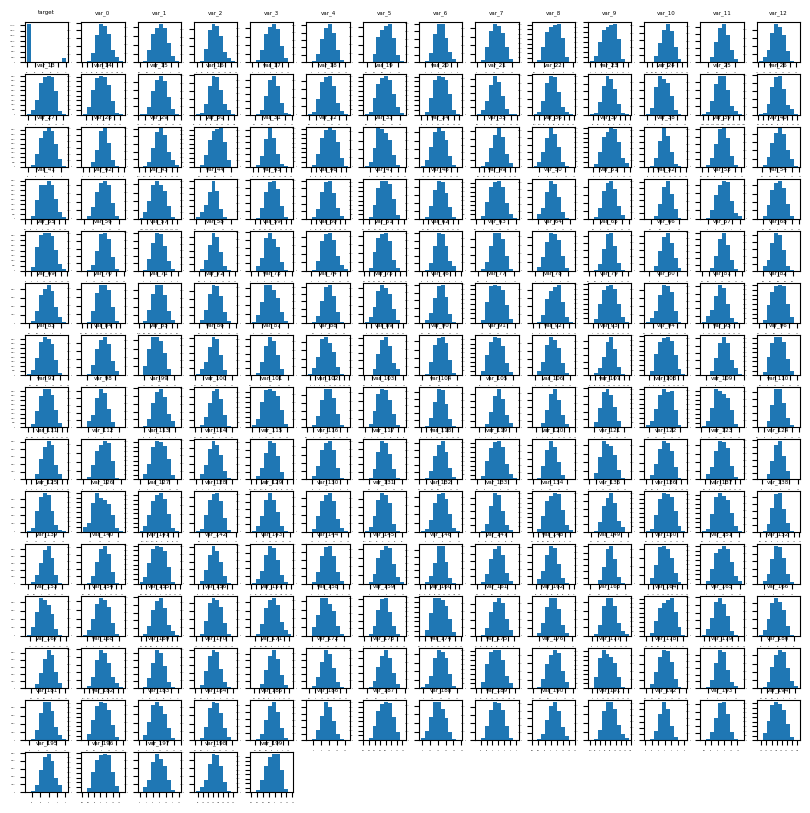

In [19]:
import matplotlib

params = {
    'axes.titlesize':'4',
    'xtick.labelsize':'0',
    'ytick.labelsize':'0'
}
matplotlib.rcParams.update(params)

train.hist(bins=10, grid=False, ylabelsize=0, xlabelsize=0, figsize=(10,10))

print("Histogram of all features")

In [20]:
train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [21]:
train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

Frequency distribution w.r.t. target


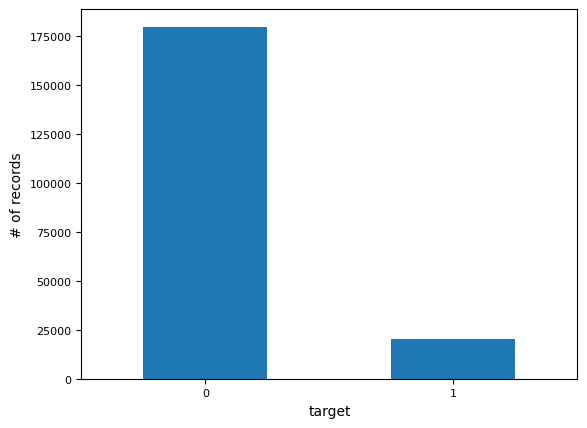

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
train['target'].value_counts().plot.bar(ylabel = '# of records', fontsize = 8)
plt.xticks([0,1], [0,1], rotation='horizontal')

print("Frequency distribution w.r.t. target")

In [24]:
train2 = train.copy().drop(['ID_code'], axis=1)

train2['target'] = train2['target'].astype('category')

train2.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,1

In [25]:
train2_sample = train2.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.01))

train2_sample.head()

/var/folders/n8/j5ztf5qj7m113hkd7hdp59pm0000gn/T/ipykernel_25719/239994941.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train2_sample = train2.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.01))
/var/folders/n8/j5ztf5qj7m113hkd7hdp59pm0000gn/T/ipykernel_25719/239994941.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train2_sample = train2.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.01))


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
111289,0,8.7185,5.0244,9.0373,6.7803,12.1054,3.2713,5.9592,12.0484,-0.2220,7.1931,5.5545,-8.1230,14.0060,13.3040,2.3431,14.1906,7.9570,-15.0607,-0.8869,20.2790,15.2651,27.6925,1.7847,1.9976,10.6463,13.4211,-5.6938,-1.0708,5.0794,6.2060,-1.1073,15.1525,4.1262,16.0988,12.0656,-0.5827,-0.9088,6.6000,12.6099,-2.0197,-7.3889,10.8015,10.5770,11.8819,9.3274,5.4380,12.5321,-26.7800,-14.0662,19.6464,12.8249,-1.4602,0.8903,4.7174,-6.9516,17.2139,19.8000,8.0468,4.6154,8.9503,19.5468,-34.5513,0.0988,1.3366,8.7910,6.0556,6.4651,18.1659,5.0098,-10.1210,25.4591,0.3879,-6.5960,20.1475,16.0646,14.5427,14.2790,13.5673,7.2385,15.6291,2.4637,13.6151,6.2095,2.6078,-5.4401,17.5797,13.4115,14.3624,9.1517,1.7328,-40.9998,7.1993,8.0909,10.5731,8.7776,0.9729,21.8630,13.2144,1.4563,-1.8156,-10.6893,22.5395,14.0683,1.1938,11.9394,3.1433,7.8020,18.1111,14.2331,21.4539,4.8045,5.2871,6.7480,2.2330,2.8719,-1.4408,4.2759,32.9729,1.1555,6.0895,3.9040,13.4364,-6.3721,14.6612,4.6291,12.3330,14.2784,1.4081,-6.4345,10.8979,12.7166,0.5386,9.2459,6.4818,-3.3129,-4.5158,33.2832,41.1209,-7.8045,-5.2411,9.8057,-1.0568,8.8521,11.2290,8.3458,12.9113,8.3357,-8.0564,4.0906,10.9369,18.8506,11.2970,11.8623,16.7763,1.3546,-6.2472,13.0640,5.6493,17.4488,10.2362,7.9566,5.7093,4.2437,13.7844,3.8982,28.1426,2.9045,-12.9381,5.2351,5.6358,6.7664,2.2600,10.4855,-9.7298,31.7839,9.6413,4.6199,16.0568,-2.5911,4.3483,3.8336,12.7298,8.5648,7.1174,29.4581,-8.5844,9.4778,-15.7878,15.4302,0.2449,-1.1285,5.8889,3.3780,6.3203,11.0247,1.1360,8.5195,7.6659,21.9022,-14.3784
149215,0,10.8573,-7.0613,11.6768,11.1642,13.1859,-10.4769,6.7461,17.4001,-1.5682,6.3868,-4.2674,-2.6939,14.1155,5.7758,8.9122,14.3084,8.8495,1.3825,20.6211,6.4188,14.7883,-1.0598,7.1494,2.1504,8.8196,13.9153,-6.8110,1.1219,5.9695,10.8414,3.0616,10.3408,-4.6493,17.5894,11.2596,-2.0846,-0.8754,4.0196,9.5963,2.8965,-5.9432,12.5999,11.6818,11.6340,0.4113,-39.7924,12.5544,-22.4131,32.2160,21.8911,12.7644,12.1592,-7.3670,6.2766,11.6662,5.4325,19.1945,7.3171,5.2747,8.9305,11.5394,1.1349,1.2742,0.5289,4.3781,3.4275,8.2777,13.4446,5.0049,-1.8014,5.3599,0.3588,0.3397,31.6376,30.7225,8.8447,-13.9001,15.3934,5.6399,13.5451,0.6924,12.0123,13.4769,-1.1217,-12.8126,18.0769,8.4060,7.9854,13.6389,1.9426,-25.8073,6.8355,6.9991,11.3150,9.5575,0.0034,12.9626,33.1208,3.2176,-1.0664,-7.5347,12.8212,23.1515,1.5969,8.5626,5.1104,9.1262,20.9902,14.4064,22.5316,1.8913,6.3089,0.1184,5.8012,4.2323,3.3408,2.2273,19.3178,-12.6722,3.6559,44.1926,11.5557,4.7349,-0.5330,3.3641,12.3103,13.8

In [26]:
corr = train2_sample.corr(numeric_only=True).abs()
us = corr.unstack()
so = us.sort_values(ascending=False).drop_duplicates()
print(so[0:20])

so = so.to_frame().reset_index()
print(so[0:11])
type(so)

var_0    var_0      1.000000
var_147  var_58     0.085003
var_58   var_189    0.083360
var_156  var_69     0.083191
var_120  var_45     0.081196
var_24   var_138    0.079091
var_188  var_30     0.078430
var_199  var_47     0.077656
var_53   var_131    0.077609
var_102  var_19     0.077038
var_13   var_165    0.074374
var_82   var_119    0.074331
var_102  var_189    0.074172
var_99   var_61     0.073982
var_84   var_192    0.073798
var_90   var_156    0.073678
var_160  var_147    0.073174
var_83   var_184    0.072574
var_1    var_193    0.072347
var_71   var_52     0.071856
dtype: float64
    level_0  level_1         0
0     var_0    var_0  1.000000
1   var_147   var_58  0.085003
2    var_58  var_189  0.083360
3   var_156   var_69  0.083191
4   var_120   var_45  0.081196
5    var_24  var_138  0.079091
6   var_188   var_30  0.078430
7   var_199   var_47  0.077656
8    var_53  var_131  0.077609
9   var_102   var_19  0.077038
10   var_13  var_165  0.074374


pandas.core.frame.DataFrame

1    var_147
2     var_58
3    var_156
4    var_120
5     var_24
Name: level_0, dtype: object
1     var_58
2    var_189
3     var_69
4     var_45
5    var_138
Name: level_1, dtype: object


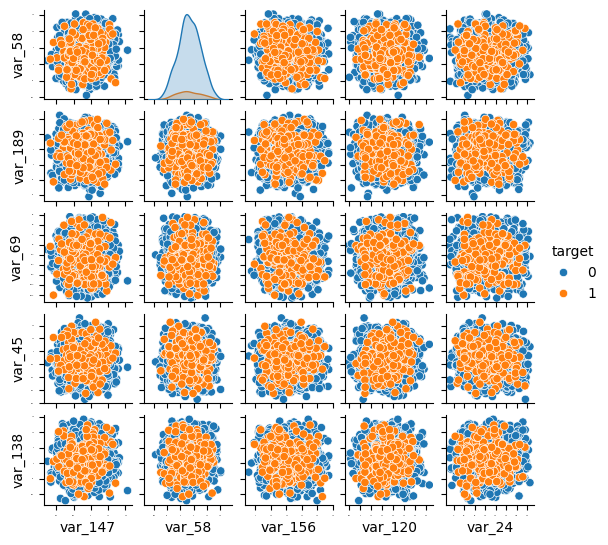

In [27]:
import seaborn as sns

x_top5 = so['level_0'][1:6]
print(x_top5)
y_top5 = so['level_1'][1:6]
print(y_top5)

sns.pairplot(data=train2_sample, x_vars=x_top5, y_vars=y_top5, hue="target", height = 1.1)